# table application_test

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

cette table a 307511 lignes et 121 colones l'identifiant unique de chaque ligne qui correspond à un prêt est SK_ID_CURR 

In [3]:
application_test = pd.DataFrame(pd.read_csv('C:/Users/kalin/application_test.csv'))
application_test 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
prof = ProfileReport(application_test)
prof.to_file(output_file='rapport_application_test.html')

Summarize dataset:   0%|          | 0/135 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# traitement des données manquantes 

In [8]:
# pourcentage de données manquantes de chaque variables :
count = application_test.isnull().sum().sort_values(ascending=False)
percentage = ((application_test.isnull().sum()/len(application_test)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values s:')
missing_application

Count and percentage of missing values s:


,Count,Percentage
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [9]:
# variables ayant plus de 50% de DM
missing_application_sup50=missing_application[ missing_application['Percentage'] > 50]
missing_application_sup50

,Count,Percentage
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [10]:
missing_application_sup50.shape

(29, 2)

# Variables à éliminer qui ne sont pas dans application_train 

In [11]:

to_drop = ['EXT_SOURCE_1', 
'WALLSMATERIAL_MODE', 
'APARTMENTS_MEDI', 
'APARTMENTS_AVG',
'APARTMENTS_MODE',
'ENTRANCES_MEDI',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'LIVINGAREA_MEDI',
'HOUSETYPE_MODE']
application_test = application_test.drop(to_drop, axis=1)
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [13]:
#suppression des 29 varibles avec plus de 50% de DM 

liste = missing_application_sup50.index.tolist()

application_test_ssDM = application_test.drop(liste, axis=1)
application_test_ssDM

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [15]:
#variables aynat des données manquantes < 50% dans la nouvelle table application_test_ssDM

application_test_ssDM.columns[application_test_ssDM.isnull().any()]

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [16]:
# Remplacer en utilisant la médiane

def DM_mediane (data, var):
    median = data[var].median()
    data[var].fillna(median, inplace=True)

In [21]:
DM_mediane(application_test_ssDM, 'AMT_ANNUITY')
DM_mediane(application_test_ssDM, 'EXT_SOURCE_2')
DM_mediane(application_test_ssDM, 'EXT_SOURCE_3')
DM_mediane(application_test_ssDM, 'YEARS_BEGINEXPLUATATION_AVG')
DM_mediane(application_test_ssDM, 'FLOORSMAX_AVG')
DM_mediane(application_test_ssDM, 'YEARS_BEGINEXPLUATATION_MODE')
DM_mediane(application_test_ssDM, 'FLOORSMAX_MODE')
DM_mediane(application_test_ssDM, 'YEARS_BEGINEXPLUATATION_MEDI')
DM_mediane(application_test_ssDM, 'FLOORSMAX_MEDI')
DM_mediane(application_test_ssDM, 'TOTALAREA_MODE')
DM_mediane(application_test_ssDM, 'OBS_30_CNT_SOCIAL_CIRCLE')
DM_mediane(application_test_ssDM, 'DEF_30_CNT_SOCIAL_CIRCLE')
DM_mediane(application_test_ssDM, 'OBS_60_CNT_SOCIAL_CIRCLE')
DM_mediane(application_test_ssDM, 'DEF_60_CNT_SOCIAL_CIRCLE')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_HOUR')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_DAY')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_WEEK')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_MON')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_QRT')
DM_mediane(application_test_ssDM, 'AMT_REQ_CREDIT_BUREAU_YEAR')

In [22]:
application_test_ssDM.columns[application_test_ssDM.isnull().any()]

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [24]:
#création d'une catégorie manquante 

application_test_ssDM['NAME_TYPE_SUITE'] = application_test_ssDM['NAME_TYPE_SUITE'].replace(np.nan, 'Missing')
application_test_ssDM['OCCUPATION_TYPE'] = application_test_ssDM['OCCUPATION_TYPE'].replace(np.nan, 'Missing')
application_test_ssDM[ 'EMERGENCYSTATE_MODE'] = application_test_ssDM[ 'EMERGENCYSTATE_MODE'].replace(np.nan, 'Missing')

In [25]:
application_test_ssDM

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [26]:
#pandas profiling 

prof = ProfileReport(application_test_ssDM)
prof.to_file(output_file='rapport_application_test_ssDM.html')

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Transformation des données quantitatives

In [29]:
# Log transformation 

to_log = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT',
        'AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
          'CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3',
           'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
        'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
        'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
         'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
         'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
         'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [30]:
application_test_ssDM_log = application_test_ssDM[to_log].applymap(lambda x: np.log(x+1))
application_test_ssDM_log

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,11.813037,13.251286,9.931176,13.017005,0.018675,1.098612,0.582023,0.148006,0.679657,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,11.502885,12.313891,9.762557,12.100718,0.035166,1.098612,0.255925,0.359743,0.683905,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
2,0.000000,12.218500,13.404930,11.153074,13.353477,0.018921,1.098612,0.530503,0.476850,0.683905,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,1.609438
3,1.098612,12.660331,14.269766,10.799973,14.269766,0.026050,1.609438,0.411896,0.477912,0.691646,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
4,0.693147,12.100718,13.346308,10.375614,13.346308,0.009982,1.386294,0.354654,0.418116,0.683905,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.000000,11.707678,12.930139,9.768498,12.506181,0.002040,0.693147,0.499911,0.496539,0.683905,...,0.693147,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147
48740,1.098612,11.967187,13.341361,10.370690,13.112315,0.035166,1.609438,0.521526,0.418116,0.683905,...,1.098612,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
48741,0.693147,12.218500,12.660331,10.410501,12.660331,0.026050,1.386294,0.490278,0.249756,0.690895,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.386294,0.693147
48742,0.000000,12.323860,13.017005,10.131778,13.017005,0.018675,1.098612,0.368594,0.467160,0.687934,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612


In [31]:
#suppression des  variables à transformer dans la table application_train_ssDM 
application_test_ssDM = application_test_ssDM.drop(to_log, axis=1)
application_test_ssDM

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100001,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
1,100005,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,Missing,Working,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
4,100038,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,...,0,0,0,0,0,0,0,0,0,0
48740,456222,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
48741,456223,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0
48742,456224,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#ajout des varaibales transformées dans la table application_train_ssDM 
application_test_ssDM2 = pd.concat([application_test_ssDM, application_test_ssDM_log], axis=1)
application_test_ssDM2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,100005,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
2,100013,Cash loans,M,Y,Y,Missing,Working,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,1.609438
3,100028,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
4,100038,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,...,0.693147,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147
48740,456222,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1.098612,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
48741,456223,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.386294,0.693147
48742,456224,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612


In [34]:
application_test_ssDM2.columns[application_test_ssDM2.isnull().any()]

Index([], dtype='object')

In [35]:
#pandas profiling 

prof = ProfileReport(application_test_ssDM2)
prof.to_file(output_file='rapport_application_test_ssDM2.html')

Summarize dataset:   0%|          | 0/94 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
application_test_ssDM2.columns[application_test_ssDM2.isnull().any()]

Index([], dtype='object')

# Données abérrantes 

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

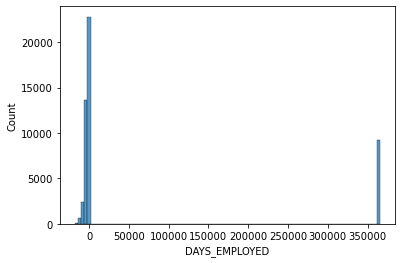

In [38]:
sns.histplot(data=application_test_ssDM2, x="DAYS_EMPLOYED",bins=100)

In [39]:
DAYS_EMPLOYED_abberante=application_test_ssDM2[ application_test_ssDM2['DAYS_EMPLOYED'] > 350000]
DAYS_EMPLOYED_abberante['DAYS_EMPLOYED']

10       365243
17       365243
22       365243
26       365243
36       365243
          ...  
48717    365243
48728    365243
48731    365243
48735    365243
48736    365243
Name: DAYS_EMPLOYED, Length: 9274, dtype: int64

In [40]:
#Suppression des données abérrantes 

indexNames = application_test_ssDM2[ application_test_ssDM2['DAYS_EMPLOYED'] > 350000 ].index
application_test_ssDM2.drop(indexNames , inplace=True)
application_test_ssDM2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,100005,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
2,100013,Cash loans,M,Y,Y,Missing,Working,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,1.609438
3,100028,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.386294
4,100038,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,...,0.693147,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147
48740,456222,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1.098612,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612
48741,456223,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.386294,0.693147
48742,456224,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.098612


# Table CSV nettoyée 

In [41]:
application_test_ssDM2.to_csv('C:/Users/kalin/application_test_prepared.csv')

# Fin preprocessing et Feature engiennering 

## Fonctions 

In [2]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category) # dummy_na =Add a column to indicate NaNs, if False NaNs are ignored
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [3]:
# Preprocess application_train.csv and application_test.csv

def application_train_test(num_rows = None, nan_as_category = False):
    # Read data 
    df = pd.read_csv('C:/Users/kalin/application_test_prepared.csv', nrows= num_rows)
    print('Test samples: {}'.format(len(df)))
    
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    
    return df

In [4]:
application_test_FE = application_train_test(num_rows = None, nan_as_category = False)
application_test_FE 

Test samples: 39470


,Unnamed: 0,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0,100001,0,0,0,-19241,-2329,-5170.0,-812,1,...,0,0,0,1,0,0.121044,0.891463,10.752690,0.840696,0.749450
1,1,100005,1,0,0,-18064,-4469,-9118.0,-1623,1,...,0,0,1,0,0,0.247398,0.934139,10.470377,0.848705,0.792809
2,2,100013,1,1,0,-20038,-4458,-2175.0,-3503,1,...,0,0,1,0,0,0.222477,0.911493,11.121758,0.912802,0.832013
3,3,100028,0,0,0,-13976,-1866,-2000.0,-4208,1,...,0,0,0,1,0,0.133515,0.887214,7.866306,0.853056,0.756843
4,4,100038,1,1,1,-13040,-2191,-4000.0,-4262,1,...,0,0,1,0,0,0.168021,0.906672,8.728823,0.857438,0.777415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,48739,456221,0,0,0,-19970,-5169,-9094.0,-3399,1,...,0,0,1,0,0,0.258838,0.905456,16.890609,0.834367,0.755483
39466,48740,456222,0,0,1,-11186,-1149,-3015.0,-3003,1,...,0,0,1,0,0,0.102718,0.896999,7.435631,0.866594,0.777334
39467,48741,456223,0,1,0,-15922,-3037,-2681.0,-1504,1,...,0,0,0,1,0,0.190742,0.965101,8.813785,0.852028,0.822293
39468,48742,456224,1,0,1,-13968,-2731,-1461.0,-1364,1,...,0,0,0,1,0,0.195518,0.946751,11.217661,0.822127,0.778349


# Fichier CSV

In [5]:
application_test_FE.to_csv('C:/Users/kalin/application_test_FE.csv')